In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [91]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [92]:
df = pd.read_csv("/Users/apple/Desktop/Datasets/AIML.csv")

In [93]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [95]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [96]:
df["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [97]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [98]:
df.shape

(6362620, 11)

Fraud Percentage: 0.13%
Flagged Fraud Percentage: 0.00%


Text(0, 0.5, 'Count')

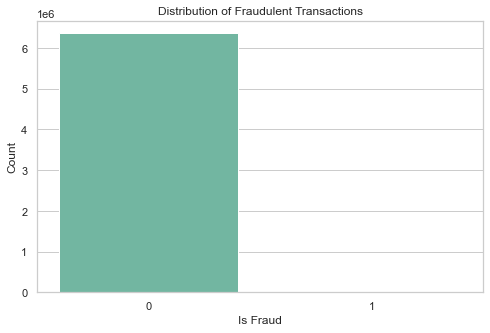

In [99]:
# Display the fraud percentage
fraud_percentage = df["isFraud"].value_counts(normalize=True)[1] * 100
print(f"Fraud Percentage: {fraud_percentage:.2f}%")
# Display the flagged fraud percentage
flagged_fraud_percentage = df["isFlaggedFraud"].value_counts(normalize=True)[1] * 100
print(f"Flagged Fraud Percentage: {flagged_fraud_percentage:.2f}%")
# Display the distribution of the 'isFraud' column
plt.figure(figsize=(8, 5))
sns.countplot(x="isFraud", data=df, palette="Set2")
plt.title("Distribution of Fraudulent Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")

In [104]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

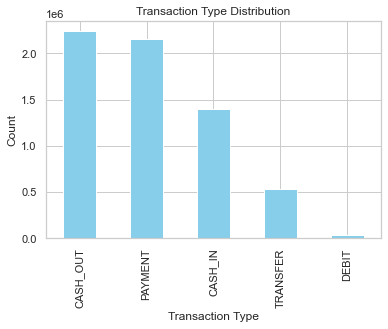

In [106]:
# Display the transaction type distribution
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

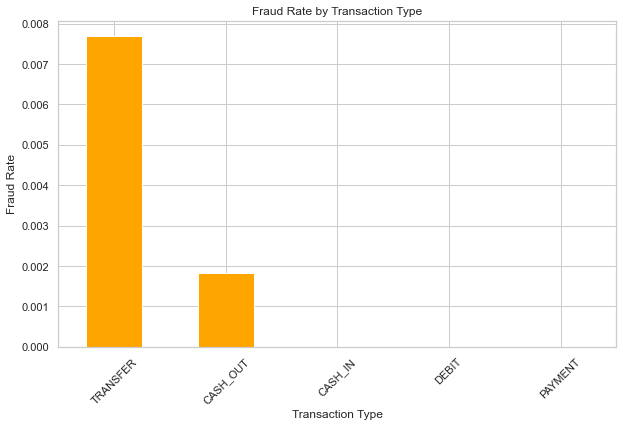

In [107]:
# Display the fraud by type
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

In [108]:
df.amount.describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

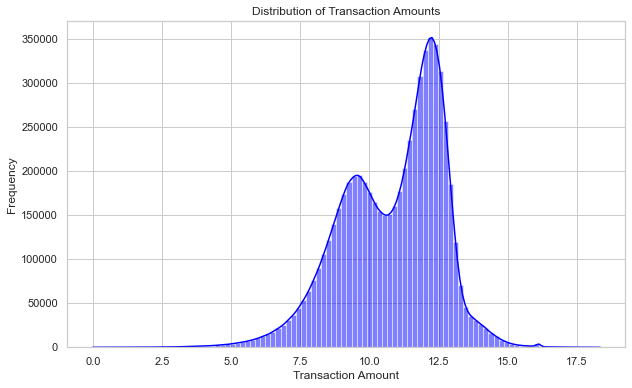

In [109]:
# histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency") 
plt.show()

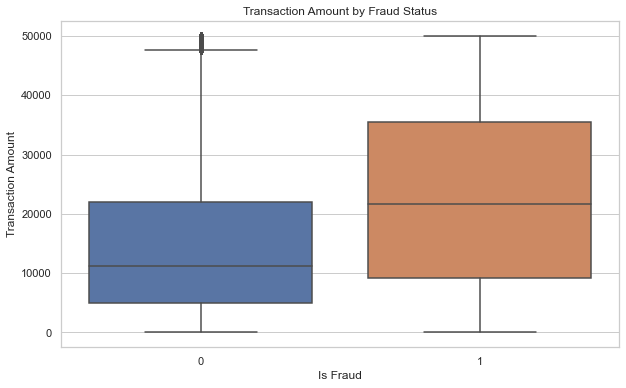

In [110]:
# Relationship between amount and fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x="isFraud", y="amount", data=df[df["amount"]<50000])
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()

In [111]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [113]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [117]:
(df['balanceDiffOrig']<0).sum()

1399253

In [118]:
(df['balanceDiffDest']<0).sum()

2806464

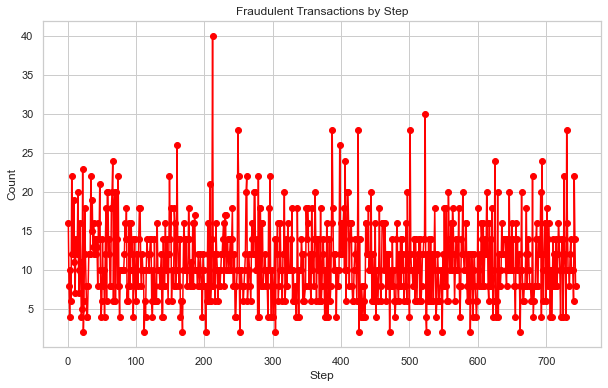

In [123]:
fraud_per_step = df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(fraud_per_step.index, fraud_per_step.values, marker='o', linestyle='-', color='red')
plt.title("Fraudulent Transactions by Step")
plt.xlabel("Step")
plt.ylabel("Count")
plt.grid(True )
plt.show()

In [124]:
df.drop(columns=["step"], inplace=True)

In [125]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [127]:
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: nameOrig, dtype: int64

In [128]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

In [130]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: nameOrig, dtype: int64

<AxesSubplot:>

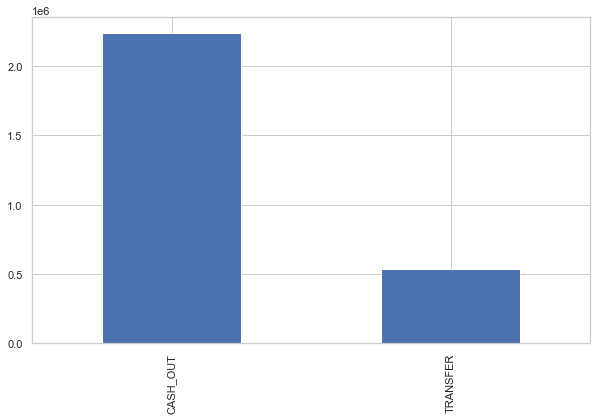

In [131]:
fraud_types = df[df["type"].isin(["CASH_OUT", "TRANSFER"])]
fraud_types["type"].value_counts().plot(kind="bar", figsize=(10, 6))

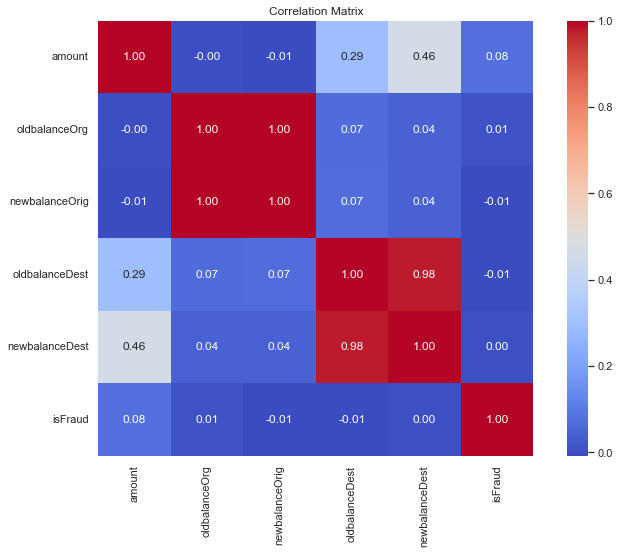

In [132]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [133]:
zero_after_transfer = df[(df["oldbalanceOrg"] > 0) & (df["newbalanceOrig"] == 0) & (df["type"].isin(["CASH_OUT", "TRANSFER"]))]
len(zero_after_transfer)

1188074

In [134]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [135]:
# The Machine Learning part
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [136]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [137]:
# Remove unnecessary columns
df_model = df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"], axis=1) 

In [138]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [139]:
categorical = ["type"]
numerical = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [140]:
y = df_model["isFraud"]
X = df_model.drop(columns=["isFraud"], axis=1)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# 30% of the data is used for testing
# 70% of the data is used for training

In [142]:
# Create a preprocessor for the categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop = "first"), categorical)
    ],
    remainder = "drop"  # Drop the rest of the columns
)

In [143]:
# Create the model pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
])

In [144]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [145]:
# Make predictions  
y_pred = pipeline.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [146]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1805568,  100754],
       [    151,    2313]])

In [147]:
# Pipeline scoring
pipeline.score(X_test, y_test)

0.9471365569529533

In [148]:
import joblib
# Save the model
joblib.dump(pipeline, "fraud_detection_model.pkl")

['fraud_detection_model.pkl']